# Tarea 3 - Titanic

El Machine Learning (aprendizaje automático) se ha convertido en una de las áreas más fascinantes y relevantes de la inteligencia artificial, permitiendo a las máquinas aprender de los datos y mejorar su rendimiento sin ser programadas explícitamente. Este trabajo se centra en explorar diversos modelos de clasificación dentro del ámbito del machine learning, destacando su importancia y aplicaciones en el mundo real.

Para evaluar la efectividad de los modelos de clasificación en machine learning, es fundamental utilizar métricas que nos permitan medir su rendimiento de manera objetiva. En este trabajo, se emplearán las siguiente métricas: **precisión, recall, F1-score, curva ROC** y **AUC**. A continuación, se describen cada una de estas métricas y su relevancia en el contexto de la evaliación de modelos:

1. **Precisión (Precision):** Esta métrica indica la proporción de verdaderos positivos entre todos los ejemplos clasificados como positivos. En otras palabras, mide la exactitud de las predicciones positivas realzadas por le modelo. UNa alta precisión es crucial en situaciones donde los falsos positivos tiene un alto costo, como en diagnósticos médicos.
$$ \text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}} $$
2. **Recall (Sensiblidad o Tasa de Vedaderos Positivos):** El recall mide la proporición de verdaderos positivos obre el total de casos que realmente son positivos. Esta métrica es especialmente importante en contextos donde es crítico identificcar todos los casos positivos, como en la detección de fraudes o enfermedades. Un alto recall significa que el modelo tiene una buena capacidad para captar os casos positivos
$$\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}$$
4. **F1-score:** Esta métrica es la media armónica entrela precisińo y el recall, proporcinando un balcne entre ambas. El F1-score es especialmente útil cunado se necesita un equilibrio entre precisión y recall, y es preferido en situaciones donde hay una clase desbalanceada. Un F1-score alto indica que el modelo tinee un buen rendimiento tanto en precisión como en recall.
$$ \text{F1-score} = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$$
5. **Curva ROC (Receiver Operating Characteristic):** La curva ROC es una representación gráfica que muestra el rendimiento de un modelo de clasificación en diferentes umbrales de decisión. En el eje Y se representa la tasa de verdaderos positivos (recall) y en el eje X la tasa de falsos positivos. Esta curva premite visualizar la capacidad del modelo para discriminar entre las clases positiva y negativa.
6. **AUC (Area Under the Curve):** El AUC es el área bajo la curva ROC. Esta métrica proporciona un solo valor que resume el rendimiento de lmodelo en todos los umbrales posibles. En AUC de 1 indica un modelo perfecto, mientras que un AUC de 0.5 sugiere que el modleo no tiene capacidad de discriminación, equivalente a una clasificación aleatoria. Un AUC alto es deseable, ya que indica que le modelo es efectivo para distinguir entre las clases.

Estas métricas son esenciales para evaluar y comparar los modelos de clasificación, permitiendo identificar el enfoque más adecuado para las necesidades específicas del problema en cuestión. A través de su análisis, se podrá obtener una visión clara sobre la efectividad de los modelos implementados y su aplicabilidad en escenarios del mundo real.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [23]:
df = pd.read_csv("data/train.csv")

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Revisaremos las dimensiones de la tabla para determinar cuántas vairables y registros contiene.

In [25]:
f"filas {df.shape[0]} columnas {df.shape[1]}"

'filas 891 columnas 12'

Ahora veremos los **valores nulos**

Los **valores nulos** son entradas e un conjunto de datos que no contiene información. Estos peueden aparecer por diversas razones, com oerrores en la recolección de datos, fallos en el sistema o simplemente porq ue la información no está disponible. En el contexto de machine learning, los valores nulos pueden tener un impacto significativo en el rendimiento de los modelos.

In [26]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

La variable `Cabin` tiene más del 50% de los datos como nulos (o faltantes), en caso de utilizarla solo generaría ruido en el modelo por ende se elimina

In [27]:
df = df.drop("Cabin", axis=1)

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Clasificación de variables
Las variables se pueden clasificar en dos categorías principales: variables categóricas y variables numéricas. A continuación, se presenta una breve explicación de cada tipo:

### Variables Categóricas

Las variables categóricas son aquellas que representan categorías o grupos. No tienen un orden intrínseco y se utilizan para clasificar datos en diferentes categorías. Estas variables pueden ser:

- Nominales: No tienen un orden específico. Ejemplos incluyen el color de un coche (rojo, azul, verde) o el tipo de fruta (manzana, plátano, naranja).

- Ordinales: Tienen un orden o jerarquía, pero las diferencias entre las categorías no son numéricamente significativas. Ejemplos incluyen niveles de satisfacción (bajo, medio, alto) o rangos (bajo, medio, alto).

### Variables Numéricas

Las variables numéricas son aquellas que representan cantidades y se pueden medir en una escala numérica. Estas variables pueden ser:

- Discretas: Toman valores enteros y representan conteos. Por ejemplo, el número de hijos en una familia o la cantidad de coches en un estacionamiento.

- Continuas: Pueden tomar cualquier valor dentro de un rango y suelen representar medidas. Ejemplos incluyen la altura de una persona, el peso, o la temperatura.


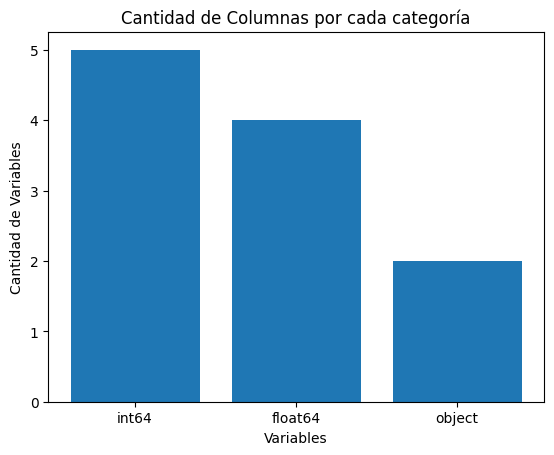

In [39]:
types = ["int64", "float64", "object"]
ncolumns_types = [0, 0, 0]
int_columns = 0
obj_columns = 0
float_columns = 0

for i in df.columns:
    match df[i].dtype:
        case "int64":
            ncolumns_types[0] += 1
        case "object":
            ncolumns_types[1] += 1
        case "float64":
            ncolumns_types[2] += 1

plt.bar(types, ncolumns_types)

plt.title('Cantidad de Columnas por cada categoría')
plt.xlabel('Variables')
plt.ylabel('Cantidad de Variables')
plt.show()